In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
boston = datasets.load_boston()
boston.keys()

C:\Users\jarvis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
boston.data[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [4]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
for i in dir(boston.data)[92:]:
    print(i, end=', ')

all, any, argmax, argmin, argpartition, argsort, astype, base, byteswap, choose, clip, compress, conj, conjugate, copy, ctypes, cumprod, cumsum, data, diagonal, dot, dtype, dump, dumps, fill, flags, flat, flatten, getfield, imag, item, itemset, itemsize, max, mean, min, nbytes, ndim, newbyteorder, nonzero, partition, prod, ptp, put, ravel, real, repeat, reshape, resize, round, searchsorted, setfield, setflags, shape, size, sort, squeeze, std, strides, sum, swapaxes, take, tobytes, tofile, tolist, tostring, trace, transpose, var, view, 

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.data.min()

0.0

In [9]:
X = boston.data
y = boston.target

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 35)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
dir(model)[44:]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [12]:
model.coef_

array([-1.10310519e-01,  3.45570272e-02,  1.06895907e-02,  2.99715642e+00,
       -1.46457244e+01,  3.74138526e+00, -2.03601243e-03, -1.25359308e+00,
        3.50834742e-01, -1.46951004e-02, -9.84846058e-01,  8.92411057e-03,
       -5.35777464e-01])

In [13]:
model.intercept_

36.23845598149086

In [14]:
model.n_features_in_

13

In [15]:
predictions = model.predict(x_test)
predictions[:5]

array([21.33059215, 21.94894129, 27.33495044, 16.35002384, 13.31465557])

In [17]:
y_test[:5]

array([21.8, 19.8, 23.2, 15.6,  7.5])

In [19]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, predictions))

Coefficients: 
 [-1.10310519e-01  3.45570272e-02  1.06895907e-02  2.99715642e+00
 -1.46457244e+01  3.74138526e+00 -2.03601243e-03 -1.25359308e+00
  3.50834742e-01 -1.46951004e-02 -9.84846058e-01  8.92411057e-03
 -5.35777464e-01]
Mean squared error: 23.16
Coefficient of determination: 0.71


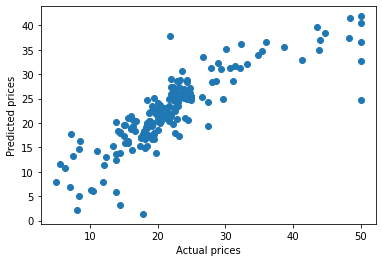

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()
